In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

**# Importing of data**

In [2]:
power_pd = pd.read_csv("C:\\Users\\BRIGHT WORLD\\Documents\\AWS\\powerconsumption.csv")
power_pd.tail()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504
52415,2017-12-30 23:50:00,6.580,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.49820


**Data Prepocessing**

**# Extracting of Data and Time**

In [3]:
power_pd['Datetime'] = pd.to_datetime(power_pd['Datetime'], format="%Y-%m-%d %H:%M:%S")

In [4]:
power_pd['Year'] = power_pd['Datetime'].dt.strftime("%Y")
power_pd['Month'] = power_pd['Datetime'].dt.strftime("%m")
power_pd['Day'] = power_pd['Datetime'].dt.strftime("%d")
power_pd['Hour'] = power_pd['Datetime'].dt.strftime("%H")

In [5]:
power_pd.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Year,Month,Day,Hour
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017,01,01,00
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017,01,01,00
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017,01,01,00
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,2017,01,01,00
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,2017,01,01,00


In [6]:
power_pd = power_pd.drop('Datetime', axis=1)

In [7]:
power_pd.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Year,Month,Day,Hour
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017,01,01,00
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017,01,01,00
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017,01,01,00
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,2017,01,01,00
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,2017,01,01,00


#  Feature engineering

In [8]:
#Temperature-Humidity Interaction
power_pd['Temp_Humidity_Interaction'] = power_pd['Temperature'] * power_pd['Humidity']

#WindSpeed-Power Interaction for each zone
power_pd['Wind_Power_Zone1_Interaction'] = power_pd['WindSpeed'] * power_pd['PowerConsumption_Zone1']
power_pd['Wind_Power_Zone2_Interaction'] = power_pd['WindSpeed'] * power_pd['PowerConsumption_Zone2']
power_pd['Wind_Power_Zone3_Interaction'] = power_pd['WindSpeed'] * power_pd['PowerConsumption_Zone3']

#Diffuse Flows Impact
power_pd['GeneralDiffuseFlows_Impact'] = power_pd['GeneralDiffuseFlows'] * (power_pd['PowerConsumption_Zone1'] + power_pd['PowerConsumption_Zone2'] + power_pd['PowerConsumption_Zone3'])
power_pd['DiffuseFlows_Impact'] = power_pd['DiffuseFlows'] * (power_pd['PowerConsumption_Zone1'] + power_pd['PowerConsumption_Zone2'] + power_pd['PowerConsumption_Zone3'])

#Lagged Features
power_pd['Lag_Temperature'] = power_pd['Temperature'].shift(1)
power_pd['Lag_Humidity'] = power_pd['Humidity'].shift(1)
power_pd['Lag_WindSpeed'] = power_pd['WindSpeed'].shift(1)
power_pd['Lag_GeneralDiffuseFlows'] = power_pd['GeneralDiffuseFlows'].shift(1)
power_pd['Lag_DiffuseFlows'] = power_pd['DiffuseFlows'].shift(1)


In [9]:
power_pd.dropna(inplace=True)
power_pd.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Year,Month,...,Wind_Power_Zone1_Interaction,Wind_Power_Zone2_Interaction,Wind_Power_Zone3_Interaction,GeneralDiffuseFlows_Impact,DiffuseFlows_Impact,Lag_Temperature,Lag_Humidity,Lag_WindSpeed,Lag_GeneralDiffuseFlows,Lag_DiffuseFlows
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017,01,...,2474.618734,1608.131307,1670.880000,4852.459071,5892.271729,6.559,73.8,0.083,0.051,0.119
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017,01,...,2330.248102,1520.534954,1573.474698,4203.799760,6780.322193,6.414,74.5,0.083,0.070,0.085
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,2017,01,...,2342.995443,1523.970820,1568.640000,5959.520120,6286.966281,6.313,74.5,0.080,0.062,0.100
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,2017,01,...,2214.191392,1447.659575,1493.835181,3055.221421,5410.287933,6.121,75.0,0.083,0.091,0.096
5,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048,2017,01,...,2156.609621,1410.729483,1468.539759,3668.109295,6714.505150,5.921,75.7,0.081,0.048,0.085


c:\Users\BRIGHT WORLD\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


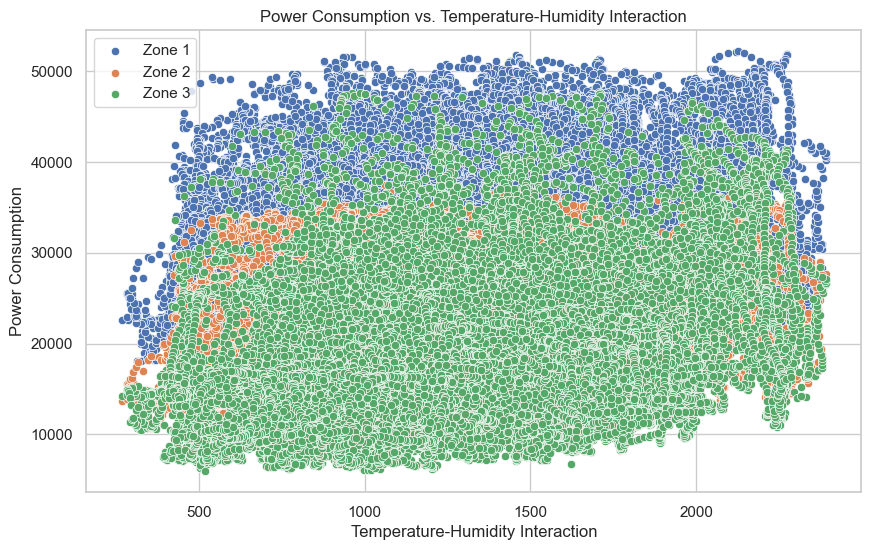

In [10]:
sns.set(style="whitegrid")

# 1. Power Consumption vs. Temperature-Humidity Interaction
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temp_Humidity_Interaction', y='PowerConsumption_Zone1', data=power_pd, label='Zone 1')
sns.scatterplot(x='Temp_Humidity_Interaction', y='PowerConsumption_Zone2', data=power_pd, label='Zone 2')
sns.scatterplot(x='Temp_Humidity_Interaction', y='PowerConsumption_Zone3', data=power_pd, label='Zone 3')
plt.title('Power Consumption vs. Temperature-Humidity Interaction')
plt.xlabel('Temperature-Humidity Interaction')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()

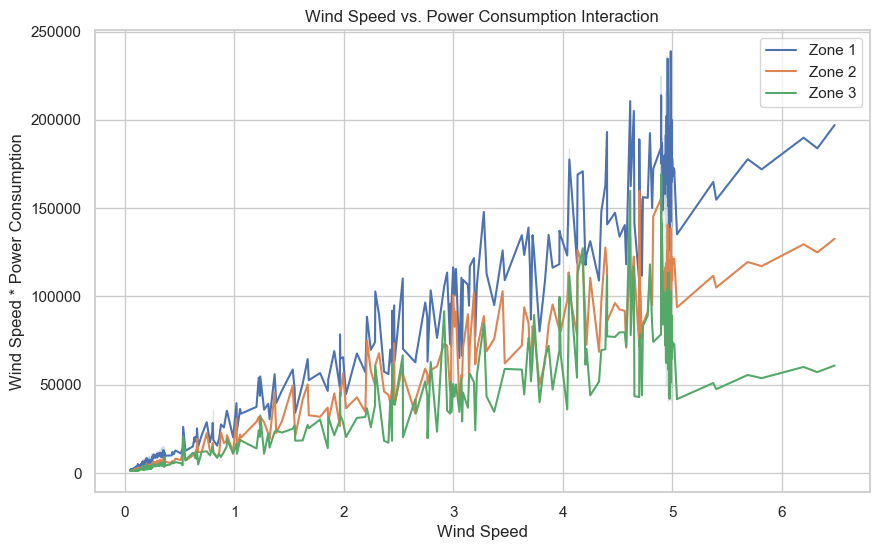

In [11]:
# 2. Wind Speed vs. Power Consumption
plt.figure(figsize=(10, 6))
sns.lineplot(x='WindSpeed', y='Wind_Power_Zone1_Interaction', data=power_pd, label='Zone 1')
sns.lineplot(x='WindSpeed', y='Wind_Power_Zone2_Interaction', data=power_pd, label='Zone 2')
sns.lineplot(x='WindSpeed', y='Wind_Power_Zone3_Interaction', data=power_pd, label='Zone 3')
plt.title('Wind Speed vs. Power Consumption Interaction')
plt.xlabel('Wind Speed')
plt.ylabel('Wind Speed * Power Consumption')
plt.legend()
plt.show()

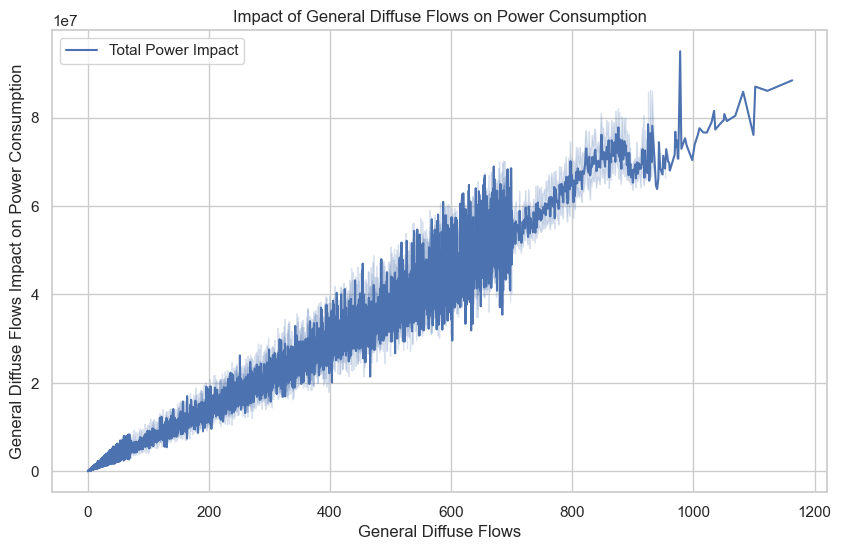

In [12]:
# 3. GeneralDiffuseFlows Impact on Power Consumption
plt.figure(figsize=(10, 6))
sns.lineplot(x='GeneralDiffuseFlows', y='GeneralDiffuseFlows_Impact', data=power_pd, label='Total Power Impact')
plt.title('Impact of General Diffuse Flows on Power Consumption')
plt.xlabel('General Diffuse Flows')
plt.ylabel('General Diffuse Flows Impact on Power Consumption')
plt.legend()
plt.show()

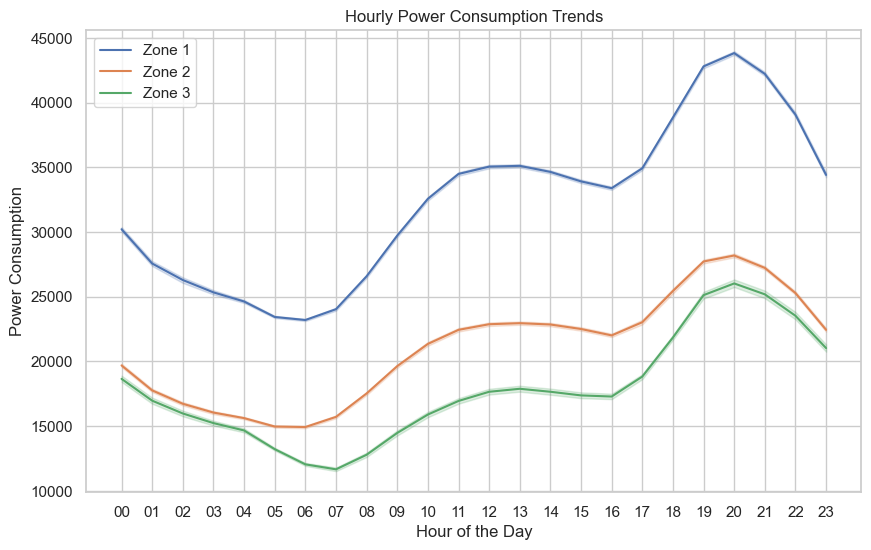

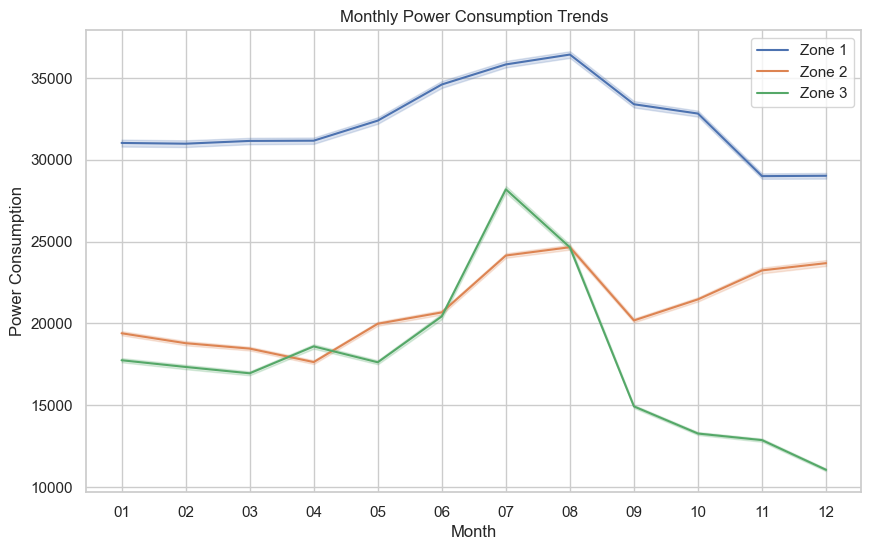

In [13]:
# 4. Hourly Power Consumption Trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour', y='PowerConsumption_Zone1', data=power_pd, label='Zone 1')
sns.lineplot(x='Hour', y='PowerConsumption_Zone2', data=power_pd, label='Zone 2')
sns.lineplot(x='Hour', y='PowerConsumption_Zone3', data=power_pd, label='Zone 3')
plt.title('Hourly Power Consumption Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()

# 5. Monthly Power Consumption Trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='PowerConsumption_Zone1', data=power_pd, label='Zone 1')
sns.lineplot(x='Month', y='PowerConsumption_Zone2', data=power_pd, label='Zone 2')
sns.lineplot(x='Month', y='PowerConsumption_Zone3', data=power_pd, label='Zone 3')
plt.title('Monthly Power Consumption Trends')
plt.xlabel('Month')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split

# Selecting features and target
features = power_pd.drop(columns=['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'])
target_zone1 = power_pd['PowerConsumption_Zone1']
target_zone2 = power_pd['PowerConsumption_Zone2']
target_zone3 = power_pd['PowerConsumption_Zone3']

#  Train-Test Split
X_train, X_test, y_train_zone1, y_test_zone1 = train_test_split(features, target_zone1, test_size=0.2, random_state=42)
_, _, y_train_zone2, y_test_zone2 = train_test_split(features, target_zone2, test_size=0.2, random_state=42)
_, _, y_train_zone3, y_test_zone3 = train_test_split(features, target_zone3, test_size=0.2, random_state=42)



In [16]:
from sklearn.ensemble import RandomForestRegressor

# Step 3: Model Selection and Training
# Training RandomForest models for each zone
model_zone1 = RandomForestRegressor(random_state=42)
model_zone2 = RandomForestRegressor(random_state=42)
model_zone3 = RandomForestRegressor(random_state=42)

model_zone1.fit(X_train, y_train_zone1)
model_zone2.fit(X_train, y_train_zone2)
model_zone3.fit(X_train, y_train_zone3)



RandomForestRegressor(random_state=42)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score 

# Step 4: Model Evaluation
# Predicting on the test set
y_pred_zone1 = model_zone1.predict(X_test)
y_pred_zone2 = model_zone2.predict(X_test)
y_pred_zone3 = model_zone3.predict(X_test)

# Evaluating the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

mae_zone1, rmse_zone1, r2_zone1 = evaluate_model(y_test_zone1, y_pred_zone1)
mae_zone2, rmse_zone2, r2_zone2 = evaluate_model(y_test_zone2, y_pred_zone2)
mae_zone3, rmse_zone3, r2_zone3 = evaluate_model(y_test_zone3, y_pred_zone3)

# Print the results
print(f"Zone 1 - MAE: {mae_zone1:.2f}, RMSE: {rmse_zone1:.2f}, R2: {r2_zone1:.2f}")
print(f"Zone 2 - MAE: {mae_zone2:.2f}, RMSE: {rmse_zone2:.2f}, R2: {r2_zone2:.2f}")
print(f"Zone 3 - MAE: {mae_zone3:.2f}, RMSE: {rmse_zone3:.2f}, R2: {r2_zone3:.2f}")

Zone 1 - MAE: 103.14, RMSE: 318.23, R2: 1.00
Zone 2 - MAE: 56.78, RMSE: 204.26, R2: 1.00
Zone 3 - MAE: 94.47, RMSE: 242.53, R2: 1.00


In [18]:
import joblib

# Serialize the models
joblib.dump(model_zone1, 'model_zone1.pkl')
joblib.dump(model_zone2, 'model_zone2.pkl')
joblib.dump(model_zone3, 'model_zone3.pkl')


['model_zone3.pkl']